In [365]:
import pandas as pd
import sklearn

In [180]:
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

## Take a Quick Look at the Data Scture

In [181]:
# Example: load a DSS dataset as a Pandas dataframe
housing = load_housing_data()
housing.head()

In [182]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY


In [183]:
# See whether there is (1) data size (2) data types (3) missing data  by using .info method
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null int64
total_rooms           20640 non-null int64
total_bedrooms        20433 non-null float64
population            20640 non-null int64
households            20640 non-null int64
median_income         20640 non-null float64
median_house_value    20640 non-null int64
ocean_proximity       20640 non-null object
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


#### Observations
1. 20,640 records with 9 independent variables and 1 target variable. The target variable is numerical. 
2. Among the independent variables, only ocean_proximity is non-numerical data type.
3. There are missing values in the total_bedrooms column, missing rate is around 1%.


In [184]:
# See what is the correct data type of ocean_proximity by using .value_counts()
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

#### Observations
1. It is categorical data type, not binary or ordinaly data type

In [185]:
# Take a look at the 5-number summary of numerical values by using .describe() method
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


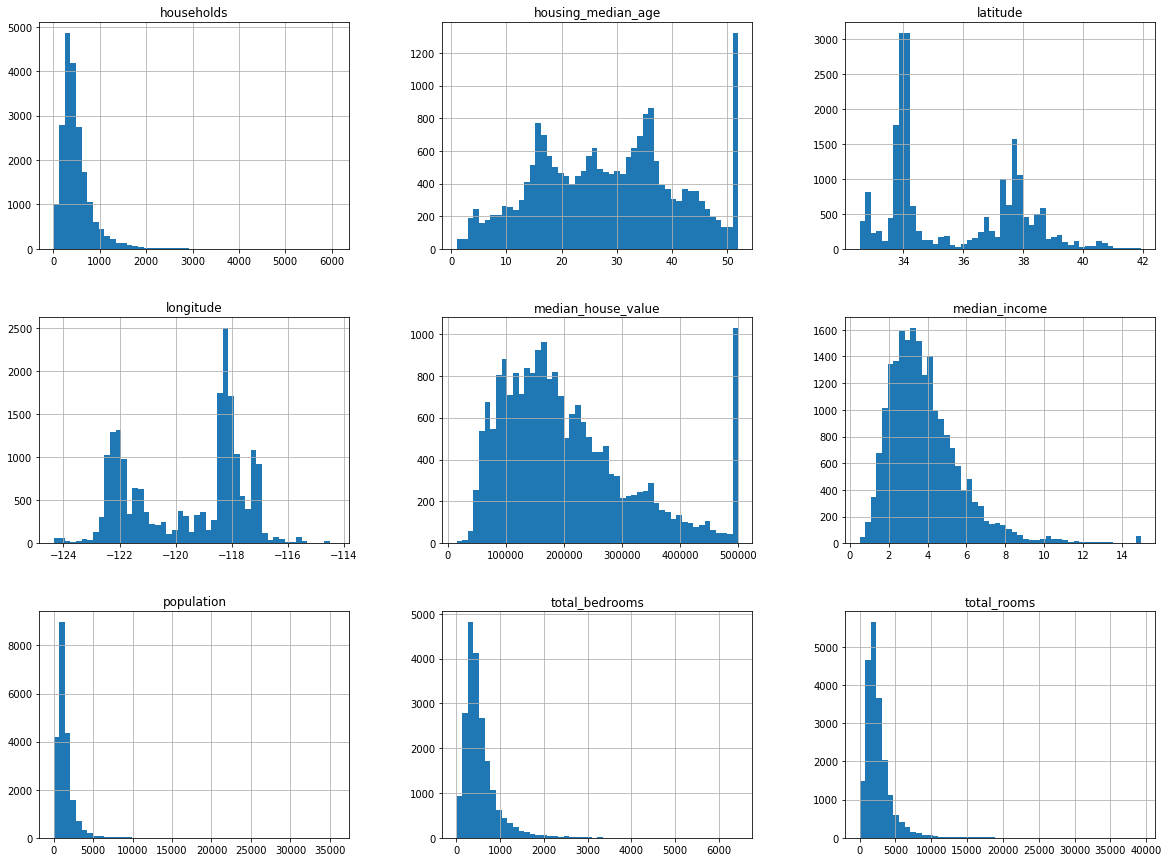

In [186]:
# Take a look at the distribution of numerical values by using histogram
# Is there any cap? Different scales? Not the usual units as common sense? 
# Normal distribution or tail/skewed distribution? 
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50,figsize=(20,15))
plt.show() #optional command, but calling it will omit many rows of text description which are useless

#### Observations
1. First, the median income attribute does not look like it is expressed in US dollars (USD). After checking with the team that collected the data , you are told that the data has been scaled and capped at 15(actually 15.0001) for higher median incomes, and at 0.5 (actually 0.49999) for lower median incomes. Working with preprocessed attributes is common in Machine Learning, and it is not necessarily a problem, but you should try to understand how teh data was computed.
2. Second, the housing median age and the median house value were also capped. The later may be a serious problem since it is your target attribute(your labels). You need to check with your client team (the team that will use your system's output) to see if this is a problem or not. If they tell you that htye need precise predictions even beyond $500,000, then you have mainly two options:
        a. Collect proper labels for the districts whose labels were capped.
        b. Remove those districts from the training set (and also from the test set)
3. These attributes have different scales. 
4. Finally, many historgrams are tail heavy, they extend much farther to the right of the median than to the left. This may make it a bit harder for some machine learnin algorithms to detect patterns. We will try transforming these attributes later on to have more bell-shaped distributions.

In [187]:
# Now! Set aside test data and don't use it until test stage.
# Method 1 : simple python function
import numpy as np
def split_train_test(data,test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size=int(len(data)*test_ratio)
    test_indices =shuffled_indices[:test_set_size]
    train_indices= shuffled_indices[test_set_size:]
    return data.iloc[train_indices],data.iloc[test_indices]

In [188]:
train_set,test_set=split_train_test(housing,0.2)
print(len(train_set),"train +",len(test_set),"test")

16512 train + 4128 test


In [189]:
# Method 2: use scikit-learn functions
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42) #42 has no any special meaning
print(len(train_set),"train +",len(test_set),"test")

16512 train + 4128 test


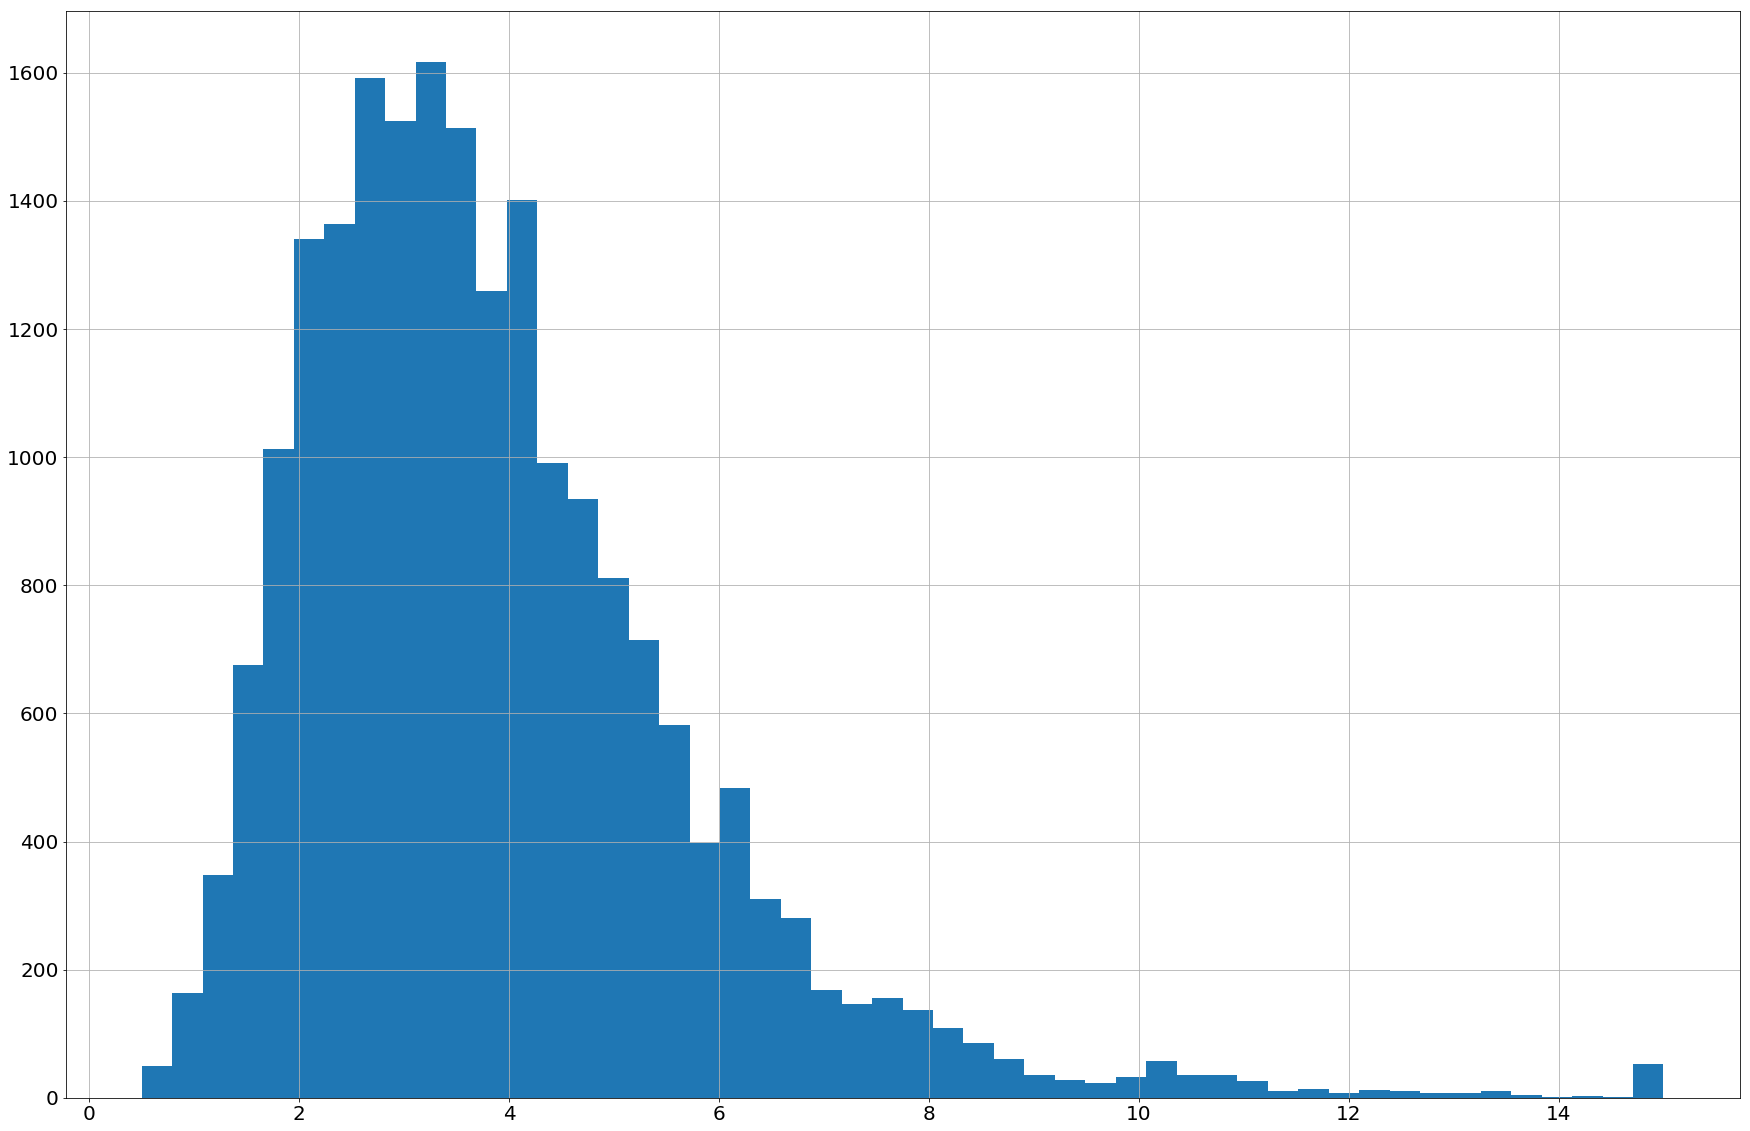

In [190]:
# Method 3: stratified sampling
housing['median_income'].hist(bins=50,figsize=(30,20))
plt.xticks(fontsize=20, rotation=0)
plt.yticks(fontsize=20, rotation=0)
plt.show()

In [191]:
housing["income_cat"]=np.ceil(housing["median_income"]/1.5)
housing["income_cat"].where(housing["income_cat"]<5,5.0,inplace=True)

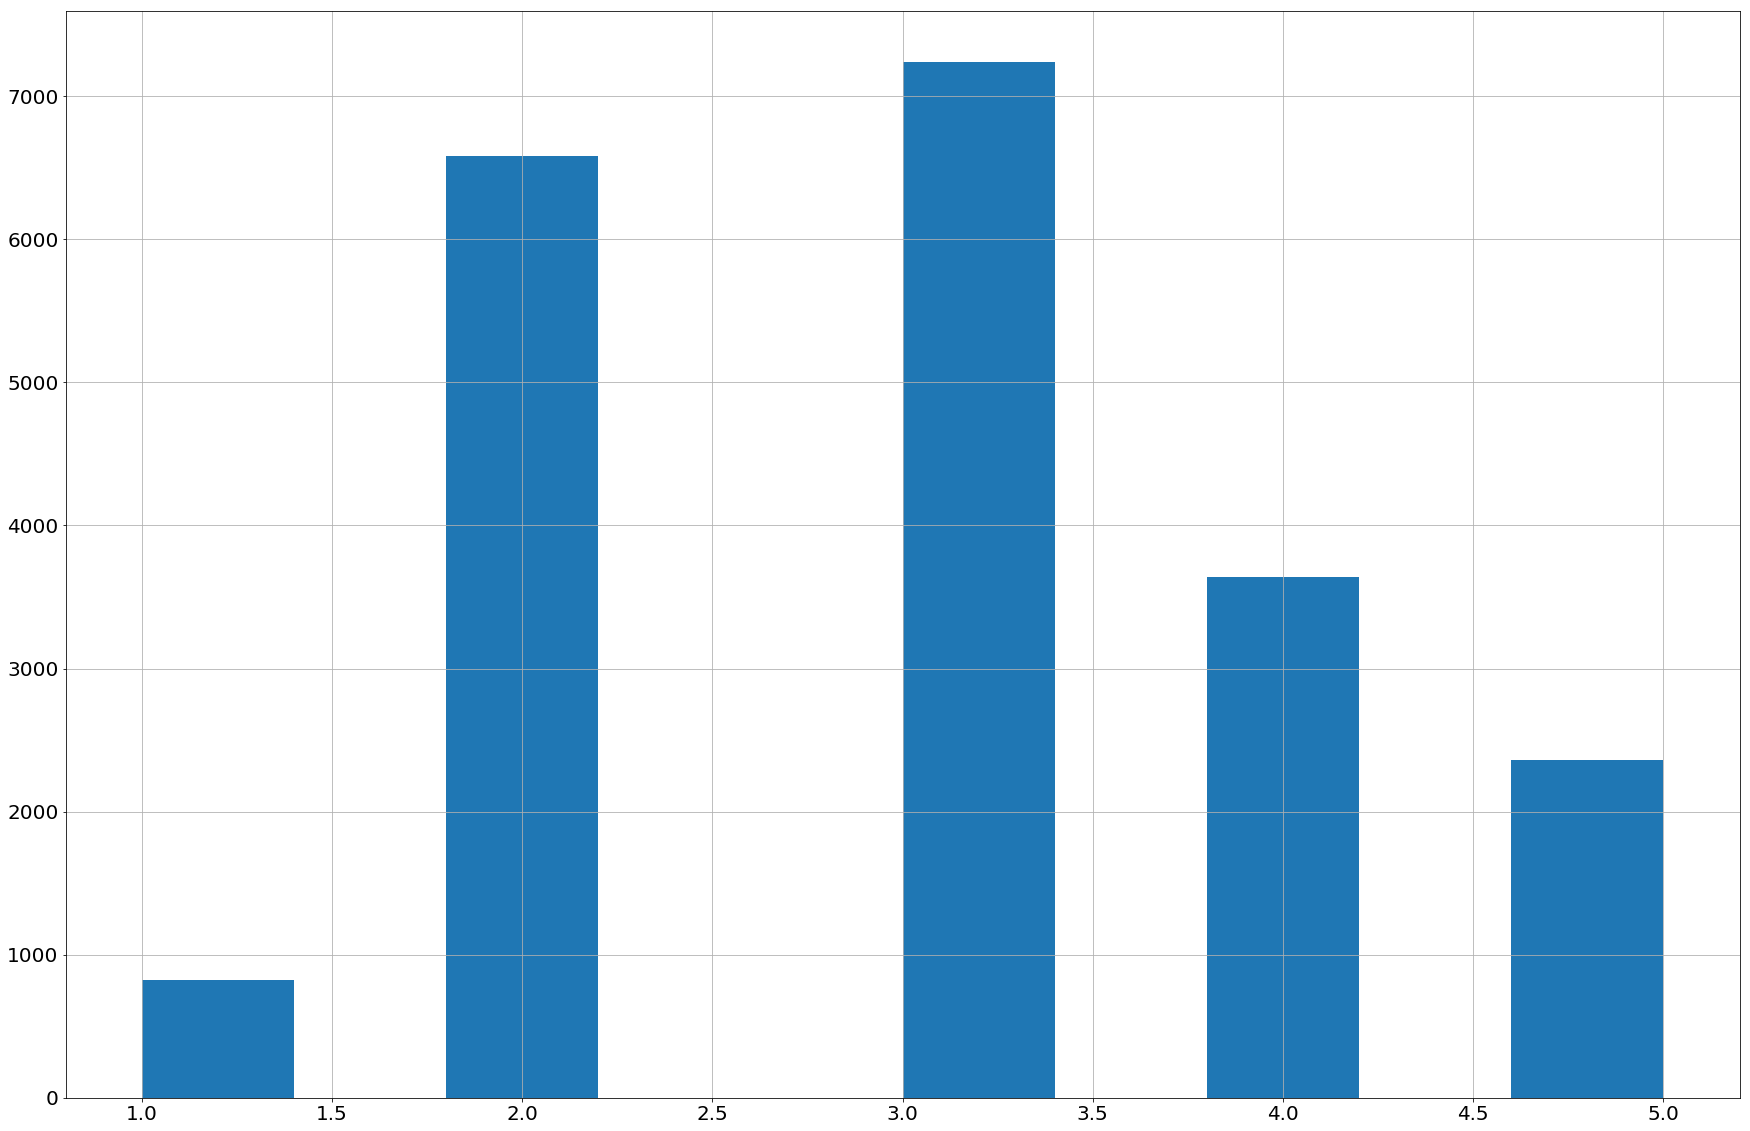

In [192]:
housing['income_cat'].hist(bins=10,figsize=(30,20))
plt.xticks(fontsize=20, rotation=0)
plt.yticks(fontsize=20, rotation=0)
plt.show()

In [193]:
# Now we are ready to do stratified sampling based on the income category
from sklearn.model_selection import StratifiedShuffleSplit
stratified_paras = StratifiedShuffleSplit(test_size=0.2, random_state=42)
for train_index, test_index in stratified_paras.split(housing,housing["income_cat"]):
    strat_train_set=housing.iloc[train_index] #iloc is position based, loc is label value based
    strat_test_set=housing.iloc[test_index]

In [194]:
strat_train_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
17080,-122.19,37.48,38,1300,269.0,608,292,4.5568,286900,NEAR BAY,4.0
7348,-118.16,33.97,39,1444,447.0,1890,416,2.1181,176600,<1H OCEAN,2.0
6188,-117.92,34.10,35,2994,603.0,1933,561,4.0052,160700,<1H OCEAN,3.0
13945,-117.20,34.26,17,9419,1455.0,1382,459,6.2233,230900,INLAND,5.0
13656,-117.30,34.05,6,2155,NaN,1039,391,1.6675,95800,INLAND,2.0


In [195]:
strat_test_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
3263,-122.88,39.14,20,1125,231.0,521,196,2.2188,106300,INLAND,2.0
10540,-117.71,33.47,14,3894,672.0,1490,629,6.5206,368500,<1H OCEAN,5.0
12741,-121.36,38.61,37,2191,394.0,951,362,3.8882,159500,INLAND,3.0
19391,-120.85,37.78,25,421,NaN,303,106,2.2679,71300,INLAND,2.0
12094,-117.40,33.85,9,7538,1125.0,3450,1077,5.4625,223600,INLAND,4.0


In [196]:
# Check whether the stratified sampling is correct
strat_test_set["income_cat"].value_counts()/len(strat_test_set)

3.0    0.350533
2.0    0.318798
4.0    0.176357
5.0    0.114583
1.0    0.039729
Name: income_cat, dtype: float64

In [197]:
strat_train_set["income_cat"].value_counts()/len(strat_train_set)

3.0    0.350594
2.0    0.318859
4.0    0.176296
5.0    0.114402
1.0    0.039850
Name: income_cat, dtype: float64

In [198]:
# Compare differernt sampling methods
def income_cat_proportions(data):
    return data["income_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall": income_cat_proportions(housing),
    "Stratified": income_cat_proportions(strat_test_set),
    "Random": income_cat_proportions(test_set),
}).sort_index()
compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100

In [199]:
compare_props

,Overall,Random,Stratified,Rand. %error,Strat. %error
1.0,0.039826,0.040213,0.039729,0.973236,-0.243309
2.0,0.318847,0.324370,0.318798,1.732260,-0.015195
3.0,0.350581,0.358527,0.350533,2.266446,-0.013820
4.0,0.176308,0.167393,0.176357,-5.056334,0.027480
5.0,0.114438,0.109496,0.114583,-4.318374,0.127011


In [200]:
# Finally , remove the helper income_cat because we already finished the test set generation part
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat",axis=1,inplace=True) #axis = 1 mean drop by the column

/apps/hadoop/data01/dataiku/data_dir/code-envs/python/Python3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [201]:
strat_train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 17080 to 7755
Data columns (total 10 columns):
longitude             16512 non-null float64
latitude              16512 non-null float64
housing_median_age    16512 non-null int64
total_rooms           16512 non-null int64
total_bedrooms        16349 non-null float64
population            16512 non-null int64
households            16512 non-null int64
median_income         16512 non-null float64
median_house_value    16512 non-null int64
ocean_proximity       16512 non-null object
dtypes: float64(4), int64(5), object(1)
memory usage: 1.4+ MB


## Explore the Data

In [202]:
# Create a copy of the training set so we could manipulate it without harming the training set
housing = strat_train_set.copy() #default is deep copy

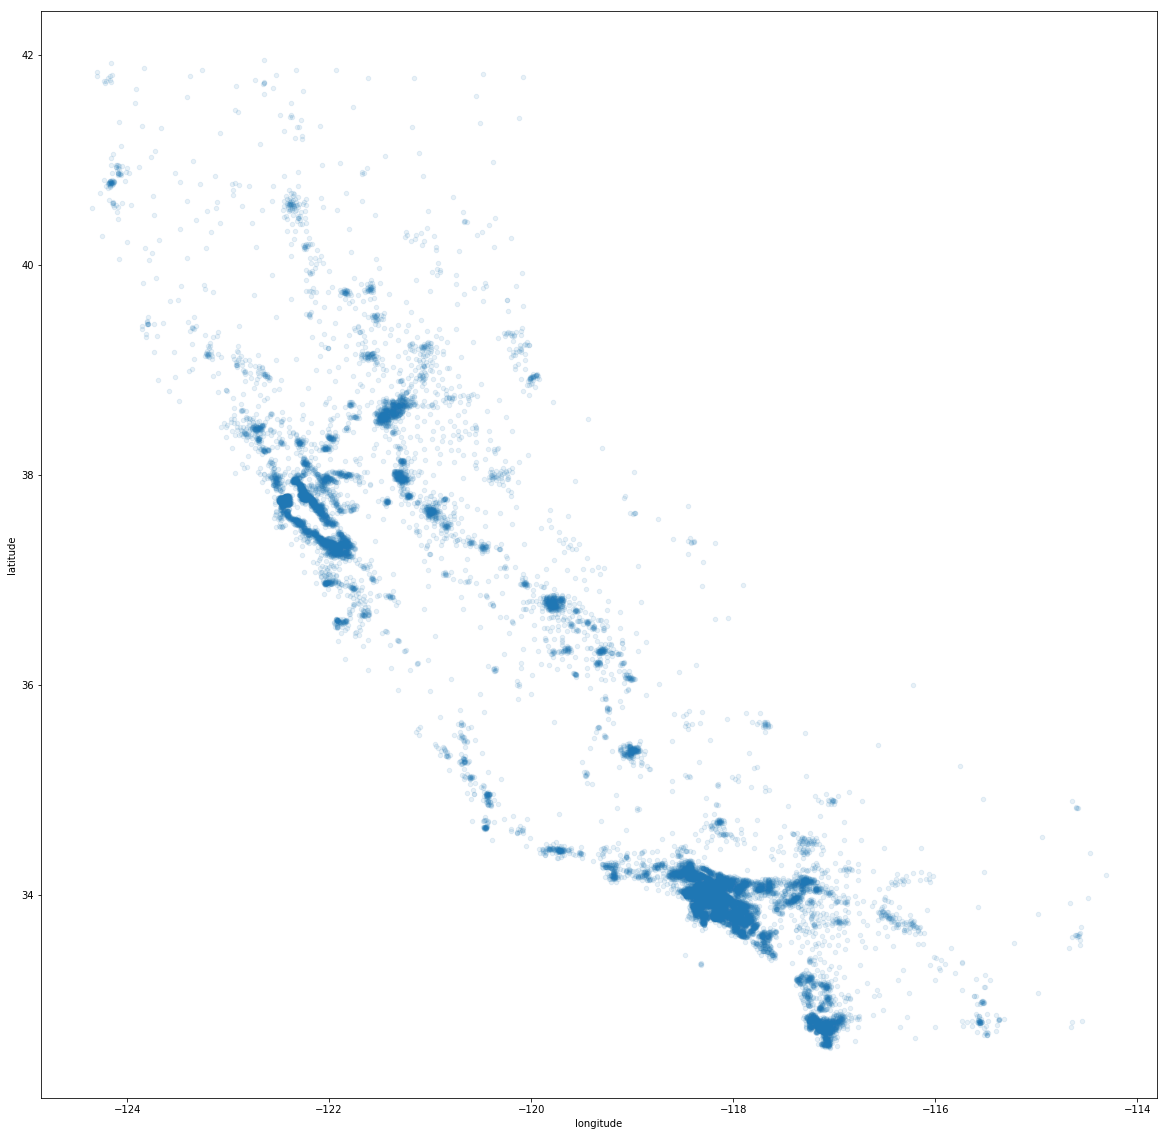

In [203]:
# Visualizing Geographical data
# Since there is geographical information (latitude and longitude), it is a good idea to create a scatterplot of all districts 
# to visualize the data
housing.plot(kind="scatter",x="longitude",y="latitude",figsize=(20,20),alpha=0.1)  
plt.show() #The alpha blending value, between 0 (transparent) and 1 (opaque).

#### Observations
1. We could know see the high-density areas, namely the Bay Area and around Los Angeles and San Diego, 
plus a long line of fairly high density in the Central Valley, in particular around Sacramento and Fresno.

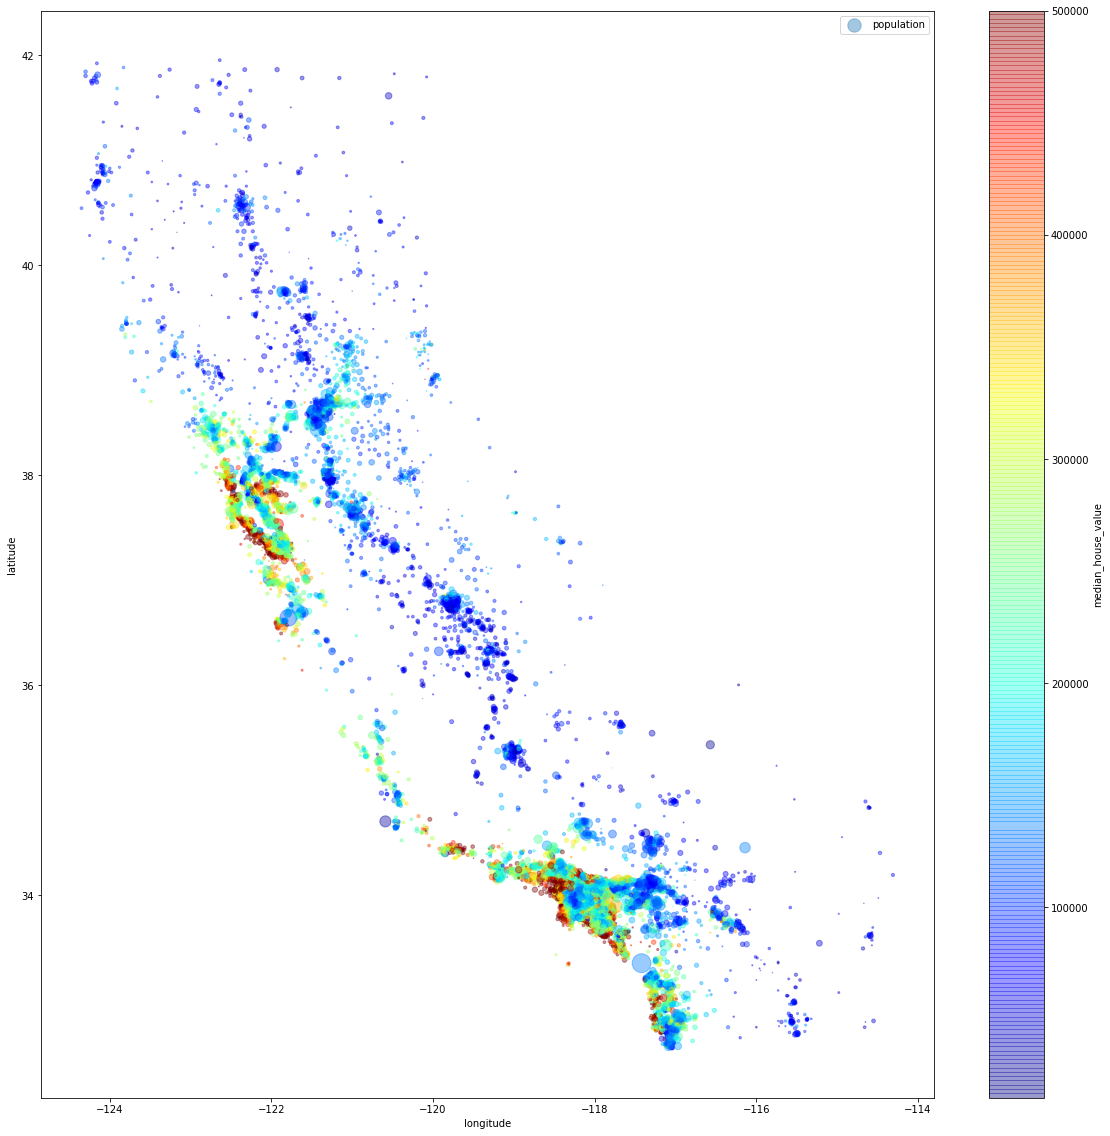

In [204]:
# Let's add two more features to the map so we could identify patterns on the visualization
# The radius of each circle represents the district's population (option s), and the color represents the price (option c).
# We will use a predefined color map (option cmap) called jet, which ranges from blue (low values) to red(high prices)

housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
    s=housing["population"]/100, label="population", figsize=(20,20),
    c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)
plt.show()
# save_fig("housing_prices_scatterplot") # save image

#### Observations
1. It looks like the housing prices are very much realted to the locations and to the population density. 
2. It will probably be useful to use a clustering algorithm to detect the main clsuters, and add new features that measure the proximity to the cluster centers.


In [205]:
# Looking for Correlation
# Method 1: Since the dataset is not too large, we can easily compute the standard correlaton coefficient(also called Pearson's r) 
# between every pair of attributes using the corr() method
corr_matrix = housing.corr()
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.923714,-0.103278,0.036418,0.062633,0.089086,0.046089,-0.015325,-0.046952
latitude,-0.923714,1.000000,0.006478,-0.028048,-0.060123,-0.100351,-0.063534,-0.080775,-0.144846
housing_median_age,-0.103278,0.006478,1.000000,-0.356737,-0.316702,-0.289229,-0.297680,-0.119526,0.108680
total_rooms,0.036418,-0.028048,-0.356737,1.000000,0.929195,0.852256,0.916042,0.197307,0.133371
total_bedrooms,0.062633,-0.060123,-0.316702,0.929195,1.000000,0.870117,0.977683,-0.011084,0.047338
population,0.089086,-0.100351,-0.289229,0.852256,0.870117,1.000000,0.902676,0.004113,-0.026199
households,0.046089,-0.063534,-0.297680,0.916042,0.977683,0.902676,1.000000,0.010622,0.064481
median_income,-0.015325,-0.080775,-0.119526,0.197307,-0.011084,0.004113,0.010622,1.000000,0.687691
median_house_value,-0.046952,-0.144846,0.108680,0.133371,0.047338,-0.026199,0.064481,0.687691,1.000000


In [206]:
# We could sort the correlation coefficient values 
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687691
total_rooms           0.133371
housing_median_age    0.108680
households            0.064481
total_bedrooms        0.047338
population           -0.026199
longitude            -0.046952
latitude             -0.144846
Name: median_house_value, dtype: float64

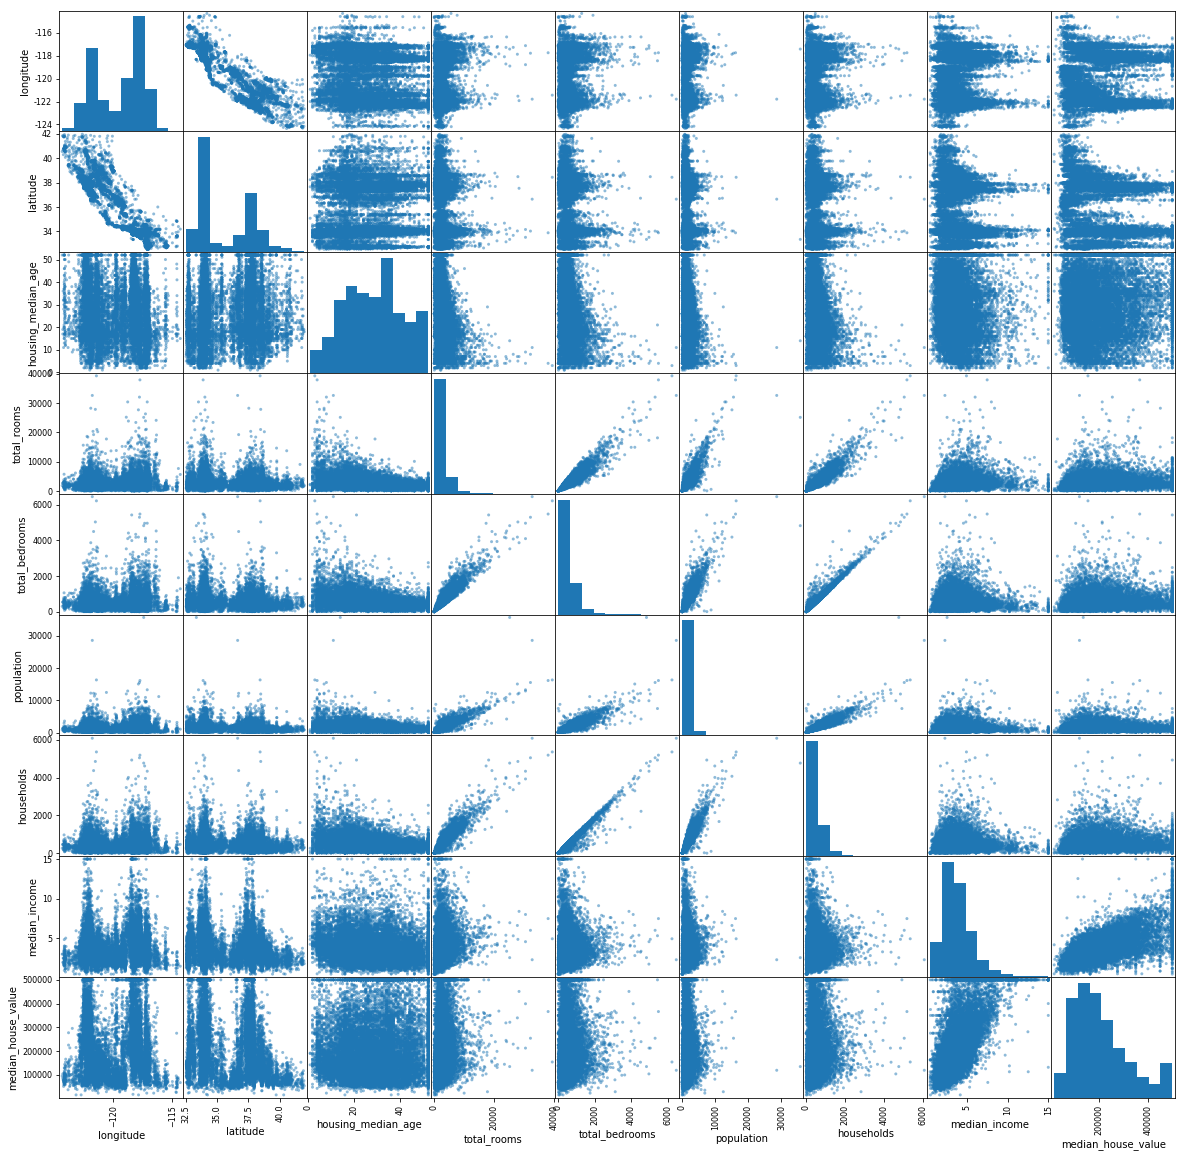

In [207]:
# Method 2: Using Panda's scatter_matrix function
from pandas.plotting import scatter_matrix
scatter_matrix(housing,figsize=(20,20))  # The main diagnoal is the histogram because otherwise it will be a straight line
plt.show()

#### Observations
1. The most promising attribute to predict the median house value is the median income, so let's zoom in by analyzing the scatterplot.

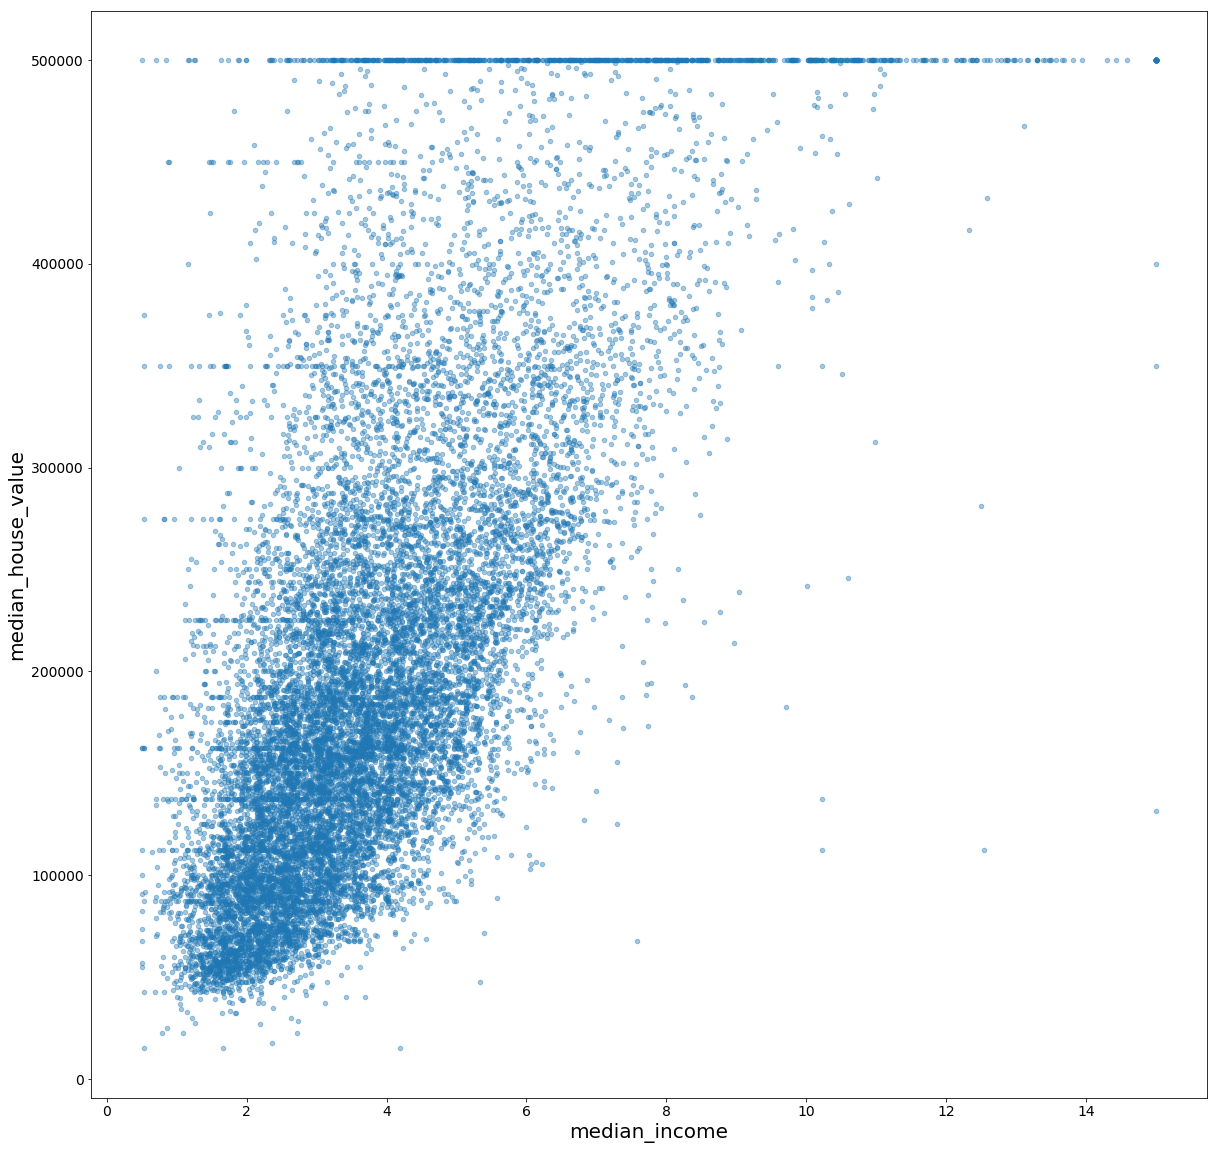

In [208]:
ax=housing.plot(kind='scatter',x='median_income',y="median_house_value",alpha=0.4,figsize=(20,20))
ax.tick_params(axis = 'both', which = 'major', labelsize = 14) #another way to change tick size
ax.xaxis.label.set_fontsize(20)
ax.yaxis.label.set_fontsize(20)
plt.show()

#### Observations
1. There is a strong upward trend.
2. Besides the median_house_value = \$500,000  horizontal line, the plot also reveals other less obvious straight lines:
    
        a.a horizontal line around $450,000
 b.a horizontal line around $350,000
        c.a horizontal line around $280,000
   We may want to try removing the corresponding districts to prevent algorithm from learning to reproduce these data quirks.

## Experimenting with Attribute Combinations(Feature Engineering - Feature Extraction)

In [209]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]

In [210]:
# Look at the correlation matrix again
corr_matrix = housing.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687691
rooms_per_household         0.145258
total_rooms                 0.133371
housing_median_age          0.108680
households                  0.064481
total_bedrooms              0.047338
population_per_household   -0.024885
population                 -0.026199
longitude                  -0.046952
latitude                   -0.144846
bedrooms_per_room          -0.255939
Name: median_house_value, dtype: float64

# Step 4: Prepare the Data for Machine Learning Algorithms

## Seperate Target Variables

In [211]:
housing=strat_train_set.drop("median_house_value",axis=1)
housing_labels=strat_train_set["median_house_value"].copy()

In [212]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
17080,-122.19,37.48,38,1300,269.0,608,292,4.5568,NEAR BAY
7348,-118.16,33.97,39,1444,447.0,1890,416,2.1181,<1H OCEAN
6188,-117.92,34.10,35,2994,603.0,1933,561,4.0052,<1H OCEAN
13945,-117.20,34.26,17,9419,1455.0,1382,459,6.2233,INLAND
13656,-117.30,34.05,6,2155,NaN,1039,391,1.6675,INLAND


In [213]:
housing_labels.head()

17080    286900
7348     176600
6188     160700
13945    230900
13656     95800
Name: median_house_value, dtype: int64

## Data Cleaning

### 1. Handle Missing Value

### We have three options to cope with missing values problem.
1. Get rid of the missing value rows.
2. Get rid of the missing value attributes(columns).
3. Set the missing values to soem value (zero, the mean, the median, etc...)

In [214]:
# Option 1:
housing.dropna(subset=["total_bedrooms"]) #inplace default is False , below is just a view

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
17080,-122.19,37.48,38,1300,269.0,608,292,4.5568,NEAR BAY
7348,-118.16,33.97,39,1444,447.0,1890,416,2.1181,<1H OCEAN
6188,-117.92,34.10,35,2994,603.0,1933,561,4.0052,<1H OCEAN
13945,-117.20,34.26,17,9419,1455.0,1382,459,6.2233,INLAND
20007,-119.03,36.13,24,2259,408.0,1169,395,1.7106,INLAND
9502,-123.54,39.17,18,2251,510.0,1032,369,2.2946,<1H OCEAN
1987,-119.81,36.73,47,1314,416.0,1155,326,1.3720,INLAND
13448,-117.41,34.10,5,4937,1139.0,2204,812,2.5272,INLAND
4906,-118.26,34.01,37,2451,668.0,2824,598,1.9074,<1H OCEAN
4947,-118.29,34.02,26,2001,582.0,2044,557,1.1563,<1H OCEAN


In [215]:
# Option 2:
housing.drop("total_bedrooms",axis=1) # inplace default is False, below is just a view

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,ocean_proximity
17080,-122.19,37.48,38,1300,608,292,4.5568,NEAR BAY
7348,-118.16,33.97,39,1444,1890,416,2.1181,<1H OCEAN
6188,-117.92,34.10,35,2994,1933,561,4.0052,<1H OCEAN
13945,-117.20,34.26,17,9419,1382,459,6.2233,INLAND
13656,-117.30,34.05,6,2155,1039,391,1.6675,INLAND
19932,-119.33,36.30,11,3045,1563,516,5.4337,INLAND
20007,-119.03,36.13,24,2259,1169,395,1.7106,INLAND
9502,-123.54,39.17,18,2251,1032,369,2.2946,<1H OCEAN
1987,-119.81,36.73,47,1314,1155,326,1.3720,INLAND
13448,-117.41,34.10,5,4937,2204,812,2.5272,INLAND


In [216]:
# Option 3
median = housing["total_bedrooms"].median()
housing["total_bedrooms"].fillna(median,inplace=True)# inplace default is False. since we set it to True, it will change on teh dataset

In [217]:
housing.info() # we should use the train set median(or any value you fill the missing values with) on the test set!

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 17080 to 7755
Data columns (total 9 columns):
longitude             16512 non-null float64
latitude              16512 non-null float64
housing_median_age    16512 non-null int64
total_rooms           16512 non-null int64
total_bedrooms        16512 non-null float64
population            16512 non-null int64
households            16512 non-null int64
median_income         16512 non-null float64
ocean_proximity       16512 non-null object
dtypes: float64(4), int64(4), object(1)
memory usage: 1.3+ MB


### Scikit-learn provides a package to calculate appropriate values to fill the missing values - Imputer
Imputer works on all numeric attributes so we don't need to calculate median or mean for each atturibute

In [218]:
from sklearn.preprocessing import Imputer
imputer=Imputer(strategy="median")

In [219]:
# Since Imputer only works on numerical attributes, we need to create a seperate dataframe of only numerical attributes
housing_num=housing.drop("ocean_proximity",axis=1)
type(housing_num)#Two-dimensional size-mutable, potentially heterogeneous tabular data structure with labeled axes (rows and columns). 

pandas.core.frame.DataFrame

In [220]:
#First, fit the dataset to the imputer
imputer.fit(housing_num)

Imputer(axis=0, copy=True, missing_values='NaN', strategy='median', verbose=0)

In [221]:
#The median (or any other statistics) will be stored at .statistics_ instance variable
#We could compare them to verify whether Imputer has done the right job
imputer.statistics_

array([-118.48 ,   34.25 ,   29.   , 2143.   ,  436.   , 1169.   ,
        411.   ,    3.529])

In [222]:
housing.median().values

array([-118.48 ,   34.25 ,   29.   , 2143.   ,  436.   , 1169.   ,
        411.   ,    3.529])

In [223]:
#Then, we transform the original data set(remember, we use the train data's statistics to transform test data)
X=imputer.transform(housing_num)
type(X)

numpy.ndarray

In [224]:
# The result of a transform is a numpy array, so we need to convert it to a pandas Dataframe
# numpy array and pandas Dataframe could both represent dataset
housing_tr=pd.DataFrame(X,columns=housing_num.columns)
housing_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-122.19,37.48,38.0,1300.0,269.0,608.0,292.0,4.5568
1,-118.16,33.97,39.0,1444.0,447.0,1890.0,416.0,2.1181
2,-117.92,34.10,35.0,2994.0,603.0,1933.0,561.0,4.0052
3,-117.20,34.26,17.0,9419.0,1455.0,1382.0,459.0,6.2233
4,-117.30,34.05,6.0,2155.0,436.0,1039.0,391.0,1.6675


## 2. Feature Selection (Optional, not applicable in this case)

## 3. Feature Engineering 

## Handling Text and Categorical Attributes

In [225]:
# Now let's deal with text and categorical attributes
housing_cat=housing["ocean_proximity"]
type(housing_cat) #One-dimensional ndarray with axis labels (including time series).

pandas.core.series.Series

In [226]:
# Since most machine learning algorithms prefer to work with numbers , let's convert these categorical data to numbers.
# Pandas provide a method factorize() that maps each category to a different integer
housing_cat_encoded,housing_categories=housing_cat.factorize()
print(type(housing_cat_encoded)) #An array object represents a multidimensional, homogeneous array of fixed-size items. 

<class 'numpy.ndarray'>


In [227]:
print(type(housing_categories))#Immutable ndarray implementing an ordered, sliceable set. The basic object storing axis labels for all pandas objects

<class 'pandas.core.indexes.base.Index'>


In [228]:
housing_cat_encoded[:10]

array([0, 1, 1, 2, 2, 2, 2, 1, 2, 2])

In [229]:
housing_categories[:10]

Index(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'], dtype='object')

NEAR BAY is mapped to 0, <1H OCEAN is mapped to 1...


However, 0 or 1 or 2 doesn't mean any math meaning. In order to use them in machine learning algorithms,  so we can't directly use these 0, 1, 2, etc...
Therefore, we will create one binary attribute per category by a method called "One Hot Encoding".
However, 0 or 1 or 2 doesn't mean any math meaning. In order to use them in machine learning algorithms, 
so we can't directly use these 0, 1, 2, etc...
Therefore, we will create one binary attribute per category by a method called "One Hot Encoding".

### Scikit-learn provides a OneHotEncoder (it is an encoder in essence) to convert integer categorical values into one-hot vectors.



In [232]:
housing_cat_encoded.reshape(-1,1).shape # -1 means unspecified, 
                                        # the value is inferred from the length of the array and the remaining dimensions

(16512, 1)

In [361]:
from sklearn.preprocessing import OneHotEncoder
encoder=OneHotEncoder() # an estimator and transformer
housing_cat_1hot=encoder.fit_transform(housing_cat_encoded.reshape(-1,1)) # encoder needs a 2D array

In [231]:
housing_cat_encoded.shape

(16512,)

In [233]:
housing_cat_1hot[:10] # the result is a SciPy sparse matrix

<10x5 sparse matrix of type '<class 'numpy.float64'>'
	with 10 stored elements in Compressed Sparse Row format>

In [234]:
housing_cat_1hot[:10].toarray() # to convert it to a 2D array

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.]])

## Custom Transformers

In [235]:
from sklearn.base import BaseEstimator, TransformerMixin

# column index
rooms_ix, bedrooms_ix, population_ix, household_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
        population_per_household = X[:, population_ix] / X[:, household_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

In [236]:
housing_extra_attribs = pd.DataFrame(
    housing_extra_attribs,
    columns=list(housing.columns)+["rooms_per_household", "population_per_household"])
housing_extra_attribs.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,population_per_household
0,-122.19,37.48,38,1300,269,608,292,4.5568,NEAR BAY,4.45205,2.08219
1,-118.16,33.97,39,1444,447,1890,416,2.1181,<1H OCEAN,3.47115,4.54327
2,-117.92,34.1,35,2994,603,1933,561,4.0052,<1H OCEAN,5.3369,3.44563
3,-117.2,34.26,17,9419,1455,1382,459,6.2233,INLAND,20.5207,3.01089
4,-117.3,34.05,6,2155,436,1039,391,1.6675,INLAND,5.51151,2.65729


## 4. Feature Scaling

### Machine Learning algorithms don't perform well when the input numerical attributes have very different scales. 
### We have two options to do scale features
1. min-max scaling  - ranging from [0,1]
2. standardization  - using mean, std. 

### Using Transofrmation Pipelines


In [237]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('imputer', Imputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])

housing_num_tr = num_pipeline.fit_transform(housing_num)

In [238]:
housing_prepared=np.concatenate((housing_num_tr,housing_cat_1hot.toarray()),axis=1)

In [239]:
housing_prepared.shape

(16512, 16)

In [240]:
housing_prepared

array([[-1.31588226,  0.87005565,  0.75780567, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.69547351, -0.77149164,  0.83746296, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.81525648, -0.71069359,  0.51883377, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 1.12469583, -0.70134005,  1.15609216, ...,  1.        ,
         0.        ,  0.        ],
       [-1.44065619,  1.01971238,  1.87300785, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.71543734, -0.79955228,  0.51883377, ...,  0.        ,
         0.        ,  0.        ]])

In [331]:
#"""The code is not working""" 
# ---skip the following part for now----

In [139]:
from sklearn.base import BaseEstimator, TransformerMixin

# Create a class to select numerical or categorical columns 
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

In [140]:
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

num_pipeline = Pipeline([
        ('selector', DataFrameSelector(num_attribs)),
        ('imputer', Imputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])

cat_pipeline = Pipeline([
        ('selector', DataFrameSelector(cat_attribs)),
        ('cat_encoder', OneHotEncoder(sparse=False)),
    ])

In [141]:
from sklearn.pipeline import FeatureUnion

full_pipeline = FeatureUnion(transformer_list=[
        ("num_pipeline", num_pipeline),
        ("cat_pipeline", cat_pipeline),
    ])

In [ ]:
housing_prepared = full_pipeline.fit_transform(housing)
housing_prepared

In [ ]:
#---the end of the part ---

# Step 5: Shortlist Promising Models

## 1. Select and Train A Model

In [242]:
# First, let's try Linear Regression first
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(housing_prepared,housing_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [253]:
print("Predictions: ", [int(x) for x in lin_reg.predict(housing_prepared[:5])])
print("Labels:      ", list(housing_labels[:5]))

Predictions:  [277788, 147555, 210740, 274588, 47484]
Labels:       [286900, 176600, 160700, 230900, 95800]


In [255]:
# Measure the Performance using RMSE
from sklearn.metrics import mean_squared_error
housing_predictions=lin_reg.predict(housing_prepared)
lin_mse=mean_squared_error(housing_labels,housing_predictions)
lin_rmse=np.sqrt(lin_mse)
print(lin_rmse)

68081.62003099691


### Observations:
1. Since the housing labels ranges from 120,000 to 265,000, a rmse of 68081 is not promising.
2. This indicates that the model is underfitting, reasons could be one or more out of the followings:
        (1) The features in the model do not provide enough information to make good predictions
        (2) The model is not powerful enough
3. There are three solutions to fix underfitting problems:
        (1) Feed the training algorithm with better features
        (2) Select a more powerful model
        (3) Reduce the constraints on the model (which is not applicable on this case because the model has no regularization)

In [258]:
# Let 's try solution (2) by using a more powerful morel - DecisionTreeRegressor( a nonlinear model)
from sklearn.tree import DecisionTreeRegressor
tree_reg=DecisionTreeRegressor()
tree_reg.fit(housing_prepared,housing_labels)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [259]:
housing_predictions=tree_reg.predict(housing_prepared)
tree_mse=mean_squared_error(housing_labels,housing_predictions)
tree_rmse=np.sqrt(tree_mse)
print(tree_rmse)

0.0


### Observations:
1. This is a strong sign of overfitting!
2. Don't touch the testset until you are ready to launch a model you are confident about!
3. Therefore, we need to use part of the training set for training, and part for model validation.

In [269]:
## Better Evaluation Using Cross-Validation
from sklearn.model_selection import cross_val_score
tree_reg=DecisionTreeRegressor()
scores=cross_val_score(tree_reg,housing_prepared,housing_labels,scoring="neg_mean_squared_error",cv=10)
tree_rmse_scores=np.sqrt(-scores) #because cross_val_score use utility function (greater is better), therefore we need to negate here

In [270]:
def display_scores(scores):
    print("Scores: ", scores)
    print("Mean: ", scores.mean())
    print("Standard deviation: ", scores.std())

In [271]:
display_scores(tree_rmse_scores) 

Scores:  [75111.20644628 71673.93000117 73528.63423851 65559.45534039
 74020.9679187  72129.71072503 71759.43588943 70468.48222225
 70060.48077119 70005.61103267]
Mean:  71431.79145856238
Standard deviation:  2542.01754645486


### Observations:
1. The scores are the rmse on the validation set(1 fold), not on the 9 folds training set.
2. Cross validation comes at the cost of training the model several times, and it is not always possible.
3. However, cross validation provides not only the estimate of the performance of the model, but also a measure of how precise this estimate is (standard deviation).

In [272]:
# Use cross validation on lin_reg
lin_reg=LinearRegression()
lin_scores=cross_val_score(lin_reg,housing_prepared,housing_labels,scoring="neg_mean_squared_error",cv=10)
lin_rmse_scores=np.sqrt(-lin_scores)
display_scores(lin_rmse_scores) 

Scores:  [72998.9149852  69538.27821638 69092.53488994 65714.81834283
 68706.19203778 67701.57607461 68558.77827744 65238.71360871
 66544.3690538  68960.69143757]
Mean:  68305.48669242716
Standard deviation:  2107.2353124640736


### Observations:
1. We could tell that the Decision Tree model is overfitting so badly that it performs worse than the Liner Regression model.

In [274]:
# Use cross validation on random forest regressor
from sklearn.ensemble import RandomForestRegressor
forest_reg=RandomForestRegressor()
forest_scores=cross_val_score(forest_reg,housing_prepared,housing_labels,scoring="neg_mean_squared_error",cv=10)
forest_rmse_scores=np.sqrt(-forest_scores)
display_scores(forest_rmse_scores) 

Scores:  [55355.75934952 53292.06389973 53751.92238783 48436.41993574
 53012.98986773 51638.02960764 54944.13145945 51853.14758497
 51981.44642205 53215.85297871]
Mean:  52748.17634933678
Standard deviation:  1855.4378400684143


In [278]:
#compare to use the whole training set
forest_reg=RandomForestRegressor()
forest_reg.fit(housing_prepared,housing_labels)
forest_prediction=forest_reg.predict(housing_prepared)
forest_mse=mean_squared_error(housing_labels,forest_prediction)
forest_rmse=np.sqrt(forest_mse)
print(forest_rmse)

22215.075799052862


### Observations:
1. Even though the rmse on the validation set of Random Forest Model is the lowest of the three, we could still see there is a huge gap between the rmse on the training set and the validation set(the rmse score on the training set is much lower than that on the validation set). Therefore, it shows that all three of these models are overfitting, not underfitting.
2. Possible solution for overfitting:
        (1) Simplify the model
        (2) Constraint it(i.e., regularize it)
        (3) Get a lot more training data (not more features, but more data)

## The Goal of Shortlistin Promising Models
1. Try out many other machine learning algorithms from various categories 
2. Don't spend too much time tweaking the hyperparameters at this point
3. Just use the standard hyperparameters to shortlist a few (two to five) promising models so we could use in next step.
4. Always remember to save every model(with the hyperparameters) and its scores you train.

## 2. Save Models

### There are two ways of saving models:
1. Python's pickle module
2. sklearn.externals.joblib : more efficientat serializing large numpy arrays

In [282]:
from sklearn.externals import joblib
modelsList=[lin_reg,tree_reg,forest_reg]
modelsname=['linear_regression','decision_tree_regression','random_forest_regression']
for model,name in zip(modelsList,modelsname):
    joblib.dump(model,name+".pkl")

In [288]:
#try to reload a save model to see whether it is saved correctly
lin_reg_reload=joblib.load('linear_regression.pkl')

In [289]:
lin_reload_scores=cross_val_score(lin_reg_reload,housing_prepared,housing_labels,scoring="neg_mean_squared_error",cv=10)
lin_reload_rmse_scores=np.sqrt(-lin_reload_scores)
display_scores(lin_reload_rmse_scores)  #should match lin_rmse_scores

Scores:  [72998.9149852  69538.27821638 69092.53488994 65714.81834283
 68706.19203778 67701.57607461 68558.77827744 65238.71360871
 66544.3690538  68960.69143757]
Mean:  68305.48669242716
Standard deviation:  2107.2353124640736


# Step 6: Fine-Tune Your Model

### There are three ways in general to fine-tune your model:
1. Grid Search
2. Randomized Search
3. Ensemble Methods

## 1. Grid Search

In [311]:
from sklearn.model_selection import GridSearchCV
import time
start=time.clock()
param_grid=[
    {'n_estimators':[3,10,30],'max_features':[2,4,6,8]},
    {'bootstrap':[False], 'n_estimators':[3,10],'max_features':[2,3,4]}
]
forest_reg=RandomForestRegressor()
grid_search=GridSearchCV(forest_reg,param_grid,cv=5,scoring='neg_mean_squared_error')
grid_search.fit(housing_prepared,housing_labels)
print("Uses ", time.clock()-start,' seconds.')

Uses  40.77000000000001  seconds.


In [297]:
# get all instance variables
grid_search.__dict__.keys()

dict_keys(['scoring', 'estimator', 'n_jobs', 'fit_params', 'iid', 'refit', 'cv', 'verbose', 'pre_dispatch', 'error_score', 'return_train_score', 'param_grid', 'multimetric_', 'best_index_', 'best_params_', 'best_score_', 'best_estimator_', 'scorer_', 'cv_results_', 'n_splits_'])

In [295]:
# get the best model's hyperparameters
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [298]:
# get the best model(estimator) directly
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=8, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=30, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [309]:
# get the mean rmse for each set of parameters in cv=5
cvres=grid_search.cv_results_
cvres.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_max_features', 'param_n_estimators', 'param_bootstrap', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score', 'split0_train_score', 'split1_train_score', 'split2_train_score', 'split3_train_score', 'split4_train_score', 'mean_train_score', 'std_train_score'])

In [310]:
# the mean_test_score is the scores on the validation set!
for mean_score, params in zip(cvres['mean_test_score'],cvres['params']):
    print(np.sqrt(-mean_score), params)

63469.424271131735 {'max_features': 2, 'n_estimators': 3}
55115.3676088801 {'max_features': 2, 'n_estimators': 10}
52999.23030317681 {'max_features': 2, 'n_estimators': 30}
59334.40676216052 {'max_features': 4, 'n_estimators': 3}
52874.9348640038 {'max_features': 4, 'n_estimators': 10}
50512.72299366752 {'max_features': 4, 'n_estimators': 30}
59491.516225612184 {'max_features': 6, 'n_estimators': 3}
52572.72414671923 {'max_features': 6, 'n_estimators': 10}
50198.043499399624 {'max_features': 6, 'n_estimators': 30}
58133.49439738103 {'max_features': 8, 'n_estimators': 3}
52066.808199773215 {'max_features': 8, 'n_estimators': 10}
49815.88684127127 {'max_features': 8, 'n_estimators': 30}
61982.194690817516 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
53847.25781747797 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59737.960479159075 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52222.299848635004 {'bootstrap': False, 'max_features': 3, 'n_estimators

### Observations:
1. By using grid search here, we have improved the rmse on the validation set from 52564 to 49815.
2. Grid Search is appropriate when you only have a few parameters combinations, in this grid search, we have explored 3*4+2*3=12+6=18 combinations and it is a small dataset, we already use quite some time(about 41 seconds)to explore .

## 2. Randomized Search

### This approach has two main advantages:
1. If you let the randomized search run n iterations, it will explore n different values for each hyperparameter.
2. You have more control over the computing budget you want to allocate to hyper-parameter search, simply by setting the number of iterations.

In [327]:
from  sklearn.model_selection  import RandomizedSearchCV
from scipy.stats import randint
start=time.clock()
param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
    }

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(housing_prepared, housing_labels)
print("Uses ", time.clock()-start,' seconds.')

Uses  198.96  seconds.


In [330]:
rnd_search.best_params_

{'max_features': 7, 'n_estimators': 180}

In [328]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

49275.61584788193 {'max_features': 7, 'n_estimators': 180}
51184.716959699035 {'max_features': 5, 'n_estimators': 15}
50134.482468893 {'max_features': 3, 'n_estimators': 72}
50569.95824156357 {'max_features': 5, 'n_estimators': 21}
49322.87634192199 {'max_features': 7, 'n_estimators': 122}
50129.46326105278 {'max_features': 3, 'n_estimators': 75}
50019.64454265041 {'max_features': 3, 'n_estimators': 88}
49541.94412968703 {'max_features': 5, 'n_estimators': 100}
50032.22475589847 {'max_features': 3, 'n_estimators': 150}
62355.22838030331 {'max_features': 5, 'n_estimators': 2}


## 3. Ensemble Methods
1. Another way to fine-tune your system is to try to combine the models that perform best.
2. The group (or "ensemble") will often perform better than the best individual model(just like Random Forests perform ebtter than teh individual Decision Tress they rely on), especially better when/if the individual models make very different types of errors.

## 4. Analyze the Best Models and Their Errors
1. You will often gain good insights on the problem by inspecting the best models.

In [317]:
# Random Forest Regressor gives feature importance feature
feature_importance=grid_search.best_estimator_.feature_importances_
feature_importance

array([7.81288231e-02, 6.36669351e-02, 4.30796681e-02, 1.69797722e-02,
       1.74420883e-02, 1.75868377e-02, 1.58092252e-02, 2.88251217e-01,
       6.88539845e-02, 1.07315110e-01, 9.23937259e-02, 4.59126548e-03,
       8.43832435e-03, 1.71446138e-01, 5.79373517e-03, 2.23150559e-04])

In [345]:
# Build the attributes names list
extra_attribs = ["rooms_per_hhold","pop_per_hhold","bedrooms_per_room"]
cat_one_hot_attribs = ['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN']
attributes = num_attribs + extra_attribs + cat_one_hot_attribs

In [351]:
sorted(zip(feature_importance, attributes), reverse=True)

[(0.28825121662086295, 'median_income'),
 (0.17144613813864426, 'ISLAND'),
 (0.1073151095396992, 'pop_per_hhold'),
 (0.09239372585321605, 'bedrooms_per_room'),
 (0.07812882313687482, 'longitude'),
 (0.06885398452500259, 'rooms_per_hhold'),
 (0.06366693510385034, 'latitude'),
 (0.043079668082767905, 'housing_median_age'),
 (0.017586837738724027, 'population'),
 (0.01744208832201767, 'total_bedrooms'),
 (0.016979772186203487, 'total_rooms'),
 (0.015809225188902088, 'households'),
 (0.008438324351764604, 'INLAND'),
 (0.005793735173299787, 'NEAR BAY'),
 (0.004591265478876233, '<1H OCEAN'),
 (0.00022315055929393102, 'NEAR OCEAN')]

## Step 7 : Evaluate Your System on the Test Set

In [357]:
final_model = grid_search.best_estimator_
X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()
X_test_num=X_test.drop("ocean_proximity",axis=1)
X_test_num_tr = num_pipeline.fit_transform(X_test_num)

In [362]:
X_test_cat=X_test["ocean_proximity"]
X_test_cat_encoded,X_test_categories=X_test_cat.factorize()
X_test_cat_1hot=encoder.transform(X_test_cat_encoded.reshape(-1,1))
X_test_prepared=np.concatenate((X_test_num_tr,X_test_cat_1hot.toarray()),axis=1)

In [363]:
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)